In [2]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv('Housing.csv');
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(object)
df_cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [6]:
import pandas as pd

# Set future option to avoid warning
pd.set_option('future.no_silent_downcasting', True)

# Your mapping and columns
mapping = {
    'yes': 1,
    'no': 0,
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}

cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                      'airconditioning', 'prefarea', 'furnishingstatus']

# Apply replace and fix warning
df[cols] = df[cols].replace(mapping).infer_objects(copy=False)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [16]:
from sklearn.model_selection import train_test_split

#
X = df.drop('price', axis=1)  # All columns except 'price'
y = df['price']               # Target column


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (2, 12)
Testing set shape: (1, 12)


In [30]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)
    print(f"After encoding {col}:")
    print(df.head())


After encoding mainroad:
      price  area  bedrooms  bathrooms  stories guestroom basement  \
0  13300000  7420         4          2        3        no       no   
1  12250000  8960         4          4        4        no       no   
2  12250000  9960         3          2        2        no      yes   
3  12215000  7500         4          2        2        no      yes   
4  11410000  7420         4          1        2       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   mainroad_yes  
0          True  
1          True  
2          True  
3          True  
4          True  
After encodin

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming your dataframe is df and target column is 'price'
X = df.drop('price', axis=1)
y = df['price']

# 1. Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# Plotting regression line (only for single feature X, e.g. 'area')
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.xlabel(X.columns[0])
    plt.ylabel('Price')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()
else:
    print("Plotting regression line only possible for one feature.")


MAE: 970043.4039201637
MSE: 1754318687330.6643
R²: 0.6529242642153184
Plotting regression line only possible for one feature.


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Import and preprocess the dataset
df = pd.read_csv('housing.csv')
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X = df[numerical_cols + categorical_cols]
y = df[target]

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 2: Split data into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared: {r2:.2f}")
print("Model coefficients:", model.named_steps['regressor'].coef_)
print("Model intercept:", model.named_steps['regressor'].intercept_)


Model Evaluation:
Mean Squared Error (MSE): 1,754,318,687,330.66
R-squared: 0.65
Model coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Model intercept: 260032.35760741215


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import and preprocess the dataset
df = pd.read_csv('housing.csv')
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X = df[numerical_cols + categorical_cols]
y = df[target]

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

# Evaluate the model using MAE, MSE, and R²
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.66
R-squared (R²): 0.65


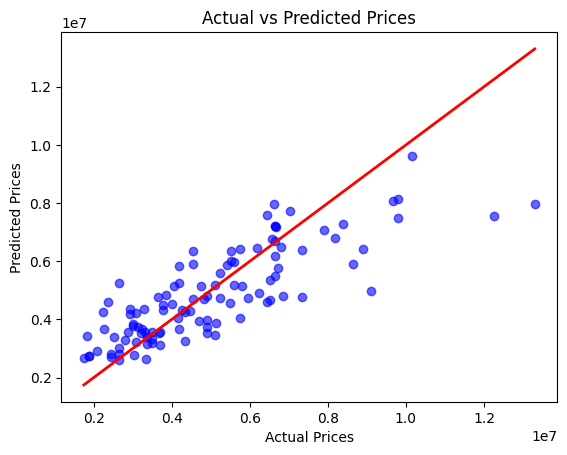

AttributeError: 'Pipeline' object has no attribute 'intercept_'

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
# Print intercept
print("Intercept (base price):", model.intercept_)

# Print coefficients with feature names
coefficients = model.coef_
feature_names = X.columns  # Make sure X is your training feature set

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

